### This is only an insertation to the overall notebook for further details regarding the VGG16 model 

In [4]:
# Import the necessary libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import shutil
from PIL import Image

#import cv2 # OpenCV needs to be installed as a package in Anaconda

from tensorflow.keras.applications import VGG16 #tensorflow needs to be installed as a package in Anaconda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Create labelled folders --> RUN ONLY ONCE (Reminder)

classes = {'0': 'letter', '1': 'form', '2': 'email', '3': 'handwritten', '4': 'advertisement', 
           '5': 'scientific report', '6': 'scientific publication', '7': 'specification', 
          '8': 'file folder', '9': 'news article', '10': 'budget', '11': 'invoice', 
          '12': 'presentation', '13': 'questionnaire', '14': 'resume', '15': 'memo'}

In [3]:
img_path_train = '/Users/nicoga/Downloads/rvl-cdip/SortedData/Training/'
img_path_val = '/Users/nicoga/Downloads/rvl-cdip/SortedData/Validation/'
img_path_test = '/Users/nicoga/Downloads/rvl-cdip/SortedData/Testing/'
img_path_real = '/Users/nicoga/Downloads/rvl-cdip/SortedData/real_data/'
img_label = ['0','1','2','3','4', '5','6','7','8','9','10','11','12','13','14','15']
img_labelname = ['letter','form','email','handwritten','advertisement', 'scientific report','scientific publication','specification','file folder','news article','budget','invoice','presentation','questionnaire','resume','memo']

# 3. Machine Learning Analysis - Model Training - Insertation VGG-16

## 3.1. Model training with VGG-16

By using the VGG-16 model, we are also benefiting from an increased accuracy due to "transfer learning" as this model has been pre-trained on more than 14 milliond images from 22000 different categories (ImageNet dataset). Thus our model does not need to start from scratch but can benefit from this "experience". (Info from: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/)

With Imagenet pretraining, we can theoretically expect an accuracy of approx. 90 percent. 
(https://paperswithcode.com/paper/cutting-the-error-by-half-investigation-of/review/?hl=2211)

Below the VGG16 model with the additional layers tailored to our 16 classes classification problem: 

Applying on whole images

In [44]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_dir = '/Users/nicoga/Downloads/rvl-cdip/SortedData/Training/'
val_dir = '/Users/nicoga/Downloads/rvl-cdip/SortedData/Validation/'
test_dir = '/Users/nicoga/Downloads/rvl-cdip/SortedData/Validation/'
real_dir= '/Users/nicoga/Downloads/rvl-cdip/SortedData/real_data/'

# Load the pre-trained VGG-16 model (excluding the top FC layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Image rescaling: 
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)
val_datagen = ImageDataGenerator(rescale=1/255.0)

# Load the training and validation data
train_data = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical', shuffle = False)
for X_train, Y_train in train_data:
    break

val_data = val_datagen.flow_from_directory(val_dir,
                                                target_size=(224, 224),
                                                batch_size=32,  class_mode='categorical', shuffle = False)
for X_val, Y_val in val_data:
    break

test_data = val_datagen.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                                batch_size=32,  class_mode='categorical', shuffle = False)
for X_test, Y_test in test_data:
    break

real_data = val_datagen.flow_from_directory(real_dir,
                                                target_size=(224, 224),
                                                batch_size=32,  class_mode='categorical', shuffle = False)
for X_real, Y_real in real_data:
    break



Found 319837 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.
Found 39995 images belonging to 16 classes.
Found 167 images belonging to 16 classes.


In [2]:
from keras.optimizers import SGD
#import tensorflow as tf
#WORKING MODEL (needed to add the flattening to make it work! (Reminder to myself))

basel_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = True 

final_model = Sequential()
final_model.add(base_model)
final_model.add(Flatten(input_shape=(224,224,3))) #this line
final_model.add(Flatten())
final_model.add(Dense(256, activation = 'relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(16, activation = 'sigmoid'))

#base_model.summary()
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                4112      
                                                                 
Total params: 21,141,584
Trainable params: 21,141,584
No

In [17]:
#model.compile(loss = 'binary_crossentropy',
            #optimizer = 'Adam',
            #metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

final_model.compile(optimizer =SGD(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'] )
        #SGD(lr = 0.001) vs 'Adam'
        
hist=final_model.fit(
    train_data, 
    validation_data=(test_data), 
    steps_per_epoch = 50, 
    batch_size = 64, 
    epochs = 25, 
    verbose = 1,
) #callbacks [mcp_save,tbCallBack])
        
        #train_data,
        
        #epochs = 100,
        #validation_data = val_data,
        #verbose = 1,
        #validation_steps = 32
        #)
# model.save('/Users/nicoga/Downloads/rvl-cdip/ModelTOP/')

import joblib

#save the model

filename = 'VGG16-v1.sav'
joblib.dump(model4, filename)

# Load the model from disk

# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)

Epoch 1/25


2023-07-28 20:16:12.336548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 2.7263 - accuracy: 0.1225 

2023-07-28 20:24:43.836252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 4553s 93s/step - loss: 2.7263 - accuracy: 0.1225 - val_loss: 2.5289 - val_accuracy: 0.2520
Epoch 2/25
50/50 [==============================] - 4880s 99s/step - loss: 2.5085 - accuracy: 0.2181 - val_loss: 2.1657 - val_accuracy: 0.3618
Epoch 3/25
50/50 [==============================] - 12663s 258s/step - loss: 2.2362 - accuracy: 0.3131 - val_loss: 1.9461 - val_accuracy: 0.4063
Epoch 4/25
50/50 [==============================] - 8274s 169s/step - loss: 2.0528 - accuracy: 0.3688 - val_loss: 1.7414 - val_accuracy: 0.4598
Epoch 5/25
50/50 [==============================] - 6293s 128s/step - loss: 1.9640 - accuracy: 0.3913 - val_loss: 1.6405 - val_accuracy: 0.5056
Epoch 6/25
50/50 [==============================] - 5441s 111s/step - loss: 1.8745 - accuracy: 0.4212 - val_loss: 1.6007 - val_accuracy: 0.5194
Epoch 7/25
50/50 [==============================] - 5426s 110s/step - loss: 1.8102 - accuracy: 0.4375 - val_loss: 1.6344 - val_accuracy: 0.5071
Epoc

ModuleNotFoundError: No module named 'joblib'

()

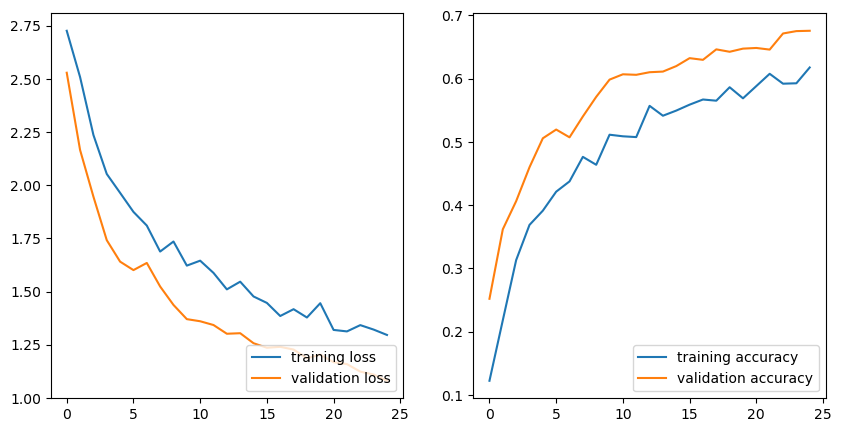

In [29]:
## Accuracy of Training and Test Prediction

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show
()

In [22]:
import joblib

#save the model

filename = 'VGG16-v1.sav'
joblib.dump(final_model, filename)

# Load the model from disk

# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)

['VGG16-v1.sav']

In [37]:
# CONFUSION MATRIX FOR TEST SET - VGG16

from sklearn.metrics import confusion_matrix 

# Predictions
pred10 = final_model.predict_generator(test_data)
predicted10 = np.argmax(pred10,axis=1)

# Actual Labels
labels10 = test_data.classes

# Compute Accuracy
conf_mat10 = confusion_matrix(predicted10, labels10)
cm10 = conf_mat10
acc10 = np.sum(conf_mat10.diagonal()) / np.sum(conf_mat10)
print('Validation accuracy: {} %'.format(acc10*100))
print(conf_mat10) 

/var/folders/4x/lv18pm2s7mv7yx7t9ygb9gx80000gn/T/ipykernel_56037/3715802279.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred10 = final_model.predict_generator(test_data)
2023-08-01 14:58:34.401936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Validation accuracy: 6.143267908488561 %
[[150 169 159 159 167 164 159 162 182 154 159 177 178 160 181 165]
 [292 293 304 272 310 296 277 295 309 297 275 284 285 327 273 292]
 [117 119 125 111 136 128  99 134 125 112 119 128 113 127 125 110]
 [126 123 111 117 111 113 130 129 108 139 124 104 122 106 122 127]
 [199 202 203 203 176 206 202 208 193 184 216 201 211 205 182 201]
 [144 148 143 156 147 141 141 161 150 134 149 140 159 163 143 160]
 [157 146 145 146 140 134 138 145 159 151 148 149 153 143 166 136]
 [150 148 158 157 159 130 147 136 125 131 169 151 127 138 158 165]
 [155 162 149 164 153 164 157 140 145 154 166 153 181 149 132 161]
 [128 165 148 154 142 164 143 147 160 145 144 151 162 146 154 169]
 [167 174 174 188 174 158 178 197 164 179 187 178 164 150 169 185]
 [ 94 102  84 114  66 110 108  96 115  90  96 104  81 112  94  84]
 [137 165 152 149 136 146 126 146 148 148 144 151 158 149 143 148]
 [114 101 114 138 140 142 141 132 137 107 129 105 131 140 103 103]
 [162 192 170 197 175

In [27]:
## CONFUSION MATRIX FOR REAL DATA SET  - VGG16

# Predictions
pred11 = final_model.predict_generator(real_data)
predicted11 = np.argmax(pred11,axis=1)

# Actual Labels
labels11 = real_data.classes

# Compute Accuracy
conf_mat11 = confusion_matrix(predicted11, labels11)
cm11 = conf_mat11
acc11 = np.sum(conf_mat11.diagonal()) / np.sum(conf_mat11)
print('Accuracy of real OAG data: {} %'.format(acc11*100))
print(conf_mat11) 

/var/folders/4x/lv18pm2s7mv7yx7t9ygb9gx80000gn/T/ipykernel_56037/3649989434.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred11 = final_model.predict_generator(real_data)
2023-08-01 14:43:53.482859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Accuracy of real OAG data: 10.179640718562874 %
[[4 1 2 0 2 1 2 6 0 0 0 0 0 0]
 [3 5 2 0 3 2 0 8 0 0 0 0 0 0]
 [3 0 2 0 2 0 1 2 0 0 0 0 0 0]
 [3 5 3 0 3 1 2 6 0 0 0 0 0 0]
 [2 0 4 0 1 1 1 8 0 0 0 0 0 0]
 [1 1 3 0 2 2 0 7 0 0 0 0 0 0]
 [2 4 0 0 4 0 2 6 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 3 0 0 1 0 0 5 0 0 0 0 0 0]
 [2 0 1 0 1 0 1 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 3 3 0 0 0 1 3 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0]]
